# Exploring the Boston Housing Dataset: Linear Regression Analysis

## Introduction

Welcome to this Jupyter Notebook, where we delve into the world of predictive modeling using the Boston Housing dataset. The Boston dataset is a classic and widely-used dataset in the field of machine learning and statistics, comprising various features related to housing in the Boston area. In this analysis, we focus on employing Linear Regression to model and understand the relationships between different features and the median value of owner-occupied homes.

### The Boston Housing Dataset

The Boston dataset provides a rich set of information, including factors such as crime rate, average number of rooms per dwelling, proximity to employment centers, and more. Our goal is to harness the power of Linear Regression to predict housing prices based on these features. This exploration allows us to gain insights into the factors that contribute to housing values and build a model capable of making predictions on new, unseen data.

### Linear Regression Analysis

Linear Regression is a fundamental regression algorithm that models the relationship between a dependent variable (in this case, housing prices) and one or more independent variables (the various features in the dataset). We aim to understand how changes in the independent variables are associated with changes in the dependent variable, providing us with a predictive tool for housing prices.

Throughout this notebook, we'll walk through the steps of data exploration, feature analysis, model training, and evaluation. We'll assess the performance of our Linear Regression model using metrics such as mean squared error and R-squared. Additionally, visualizations will aid us in interpreting the relationships between the features and the target variable.

So, let's embark on this data analysis journey and uncover the patterns and insights hidden within the Boston Housing dataset using Linear Regression.


## Loading Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.metrics import r2_score

## Loading Dataset

In [9]:
df=pd.read_csv("boston.csv")
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
df=df.drop(["Unnamed: 0"], axis=1)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Dataset Splitting

In [11]:
Y=df["medv"]  #dependent data
X=df.drop(["medv"], axis=1) #independent data

In [14]:
X

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [15]:
# Train Test Split

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.30, random_state=42)

## Data Scaling

In [20]:
# Standardization of data
scaler=StandardScaler()

In [22]:
X_train=scaler.fit_transform(X_train)

In [23]:
X_test=scaler.transform(X_test)

## Model Development

### Hyperparameter tuning using cross validation

In [33]:
#Hyperparameter Tuning - Cross Validation

reg=LinearRegression()
reg.fit(X_train,Y_train)
mse=cross_val_score(reg, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)

In [34]:
np.mean(mse)

-25.977777430926288

### Model testing

In [35]:
#prediction
reg_pred=reg.predict(X_test)
reg_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

## Model Visualization

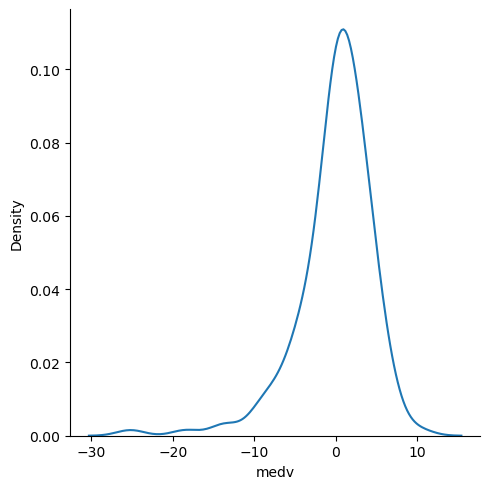

In [37]:
sns.displot(reg_pred-Y_test, kind='kde')

## Model Evaluation

In [40]:
score=r2_score(reg_pred, Y_test)
score

0.6693702691495592